In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

%load_ext autoreload
%autoreload 2

from caltech256 import Caltech256
from deep_cnn_structures import VGG_fe, train_model, test_model, each_class_accuracy, plot_loss, plot_acc

In [4]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'test': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
       transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'visual': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ]),
}
'''
# Replace Resize() with below in pytorch 0.2
transforms.Scale(256),
'''

data_dir = 'data/256_ObjectCategories'
#data_dir = '/datasets/Caltech256/256_ObjectCategories'

In [5]:
caltech256_train = Caltech256(data_dir, data_transforms['train'], train=True)
caltech256_test = Caltech256(data_dir, data_transforms['test'], train=False)

In [6]:
vgg_fe3 = VGG_fe(24, 28*28*256)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg_fe3.fc.parameters(), lr=0.00001)

vgg_fe3 = nn.DataParallel(vgg_fe3)
vgg_fe3 = vgg_fe3.cuda()

In [7]:
vgg_fe3, record3 = train_model(vgg_fe3, caltech256_train, criterion, optimizer, num_epochs=10, batch_size=8)

0 epoch loss: 5.536019    accuracy: 0.842285%
1 epoch loss: 5.309577    accuracy: 4.858398%
2 epoch loss: 4.778527    accuracy: 21.643066%
3 epoch loss: 3.981243    accuracy: 51.318359%
4 epoch loss: 3.101000    accuracy: 75.561523%
5 epoch loss: 2.287360    accuracy: 88.757324%
6 epoch loss: 1.611030    accuracy: 94.628906%
7 epoch loss: 1.089049    accuracy: 97.143555%
8 epoch loss: 0.704694    accuracy: 98.571777%
9 epoch loss: 0.444592    accuracy: 99.414062%
Training comple in 40m, 42s


In [8]:
test_model(vgg_fe3, caltech256_test)

Test Set Accuracy: 27.783203%


0.27783203125

In [9]:
each_class_accuracy(vgg_fe3, caltech256_test)

Accuracy of class 0 : 25 %
Accuracy of class 1 : 12 %
Accuracy of class 2 : 87 %
Accuracy of class 3 :  0 %
Accuracy of class 4 : 12 %
Accuracy of class 5 :  0 %
Accuracy of class 6 :  0 %
Accuracy of class 7 : 12 %
Accuracy of class 8 : 12 %
Accuracy of class 9 : 25 %
Accuracy of class 10 : 62 %
Accuracy of class 11 : 25 %
Accuracy of class 12 : 37 %
Accuracy of class 13 :  0 %
Accuracy of class 14 : 50 %
Accuracy of class 15 : 25 %
Accuracy of class 16 : 25 %
Accuracy of class 17 :  0 %
Accuracy of class 18 : 12 %
Accuracy of class 19 : 75 %
Accuracy of class 20 : 62 %
Accuracy of class 21 : 100 %
Accuracy of class 22 :  0 %
Accuracy of class 23 :  0 %
Accuracy of class 24 :  0 %
Accuracy of class 25 : 25 %
Accuracy of class 26 : 12 %
Accuracy of class 27 : 37 %
Accuracy of class 28 : 37 %
Accuracy of class 29 : 12 %
Accuracy of class 30 : 25 %
Accuracy of class 31 : 50 %
Accuracy of class 32 : 25 %
Accuracy of class 33 :  0 %
Accuracy of class 34 : 50 %
Accuracy of class 35 : 25 %
A

In [8]:
vgg_fe4 = VGG_fe(34, 14*14*512)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg_fe4.fc.parameters(), lr=0.0001)

vgg_fe4 = nn.DataParallel(vgg_fe4)
vgg_fe4 = vgg_fe4.cuda()

In [9]:
vgg_fe4, record4 = train_model(vgg_fe4, caltech256_train, criterion, optimizer, num_epochs=5, batch_size=8)

0 epoch loss: 5.231334    accuracy: 5.053711%
1 epoch loss: 3.402459    accuracy: 36.877441%
2 epoch loss: 1.649565    accuracy: 77.148438%
3 epoch loss: 0.516300    accuracy: 95.935059%
4 epoch loss: 0.098959    accuracy: 99.658203%
Training comple in 15m, 21s


In [10]:
test_model(vgg_fe4, caltech256_test)

Test Set Accuracy: 44.726562%


0.447265625

In [11]:
each_class_accuracy(vgg_fe4, caltech256_test)

Accuracy of class 0 : 12 %
Accuracy of class 1 : 37 %
Accuracy of class 2 : 75 %
Accuracy of class 3 : 50 %
Accuracy of class 4 : 12 %
Accuracy of class 5 :  0 %
Accuracy of class 6 : 25 %
Accuracy of class 7 : 50 %
Accuracy of class 8 : 25 %
Accuracy of class 9 : 50 %
Accuracy of class 10 : 50 %
Accuracy of class 11 : 62 %
Accuracy of class 12 : 37 %
Accuracy of class 13 : 37 %
Accuracy of class 14 : 87 %
Accuracy of class 15 : 50 %
Accuracy of class 16 : 37 %
Accuracy of class 17 : 25 %
Accuracy of class 18 : 12 %
Accuracy of class 19 : 100 %
Accuracy of class 20 : 100 %
Accuracy of class 21 : 100 %
Accuracy of class 22 : 37 %
Accuracy of class 23 : 50 %
Accuracy of class 24 : 37 %
Accuracy of class 25 : 37 %
Accuracy of class 26 : 62 %
Accuracy of class 27 : 25 %
Accuracy of class 28 : 12 %
Accuracy of class 29 : 12 %
Accuracy of class 30 : 50 %
Accuracy of class 31 : 62 %
Accuracy of class 32 : 37 %
Accuracy of class 33 : 75 %
Accuracy of class 34 : 62 %
Accuracy of class 35 : 62 %

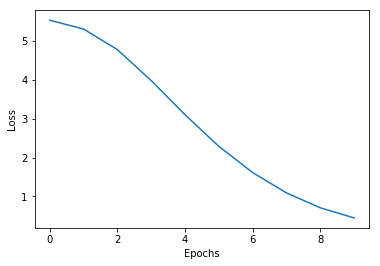

In [10]:
plot_loss(record3['loss'])

[  0.84228516   4.85839844  21.64306641  51.31835938  75.56152344
  88.75732422  94.62890625  97.14355469  98.57177734  99.4140625 ]


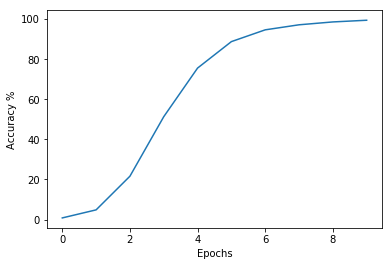

In [11]:
plot_acc(record3['acc'])

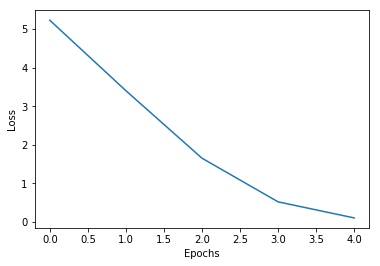

In [23]:
plot_loss(record4['loss'])

[  5.05371094  36.87744141  77.1484375   95.93505859  99.65820312]


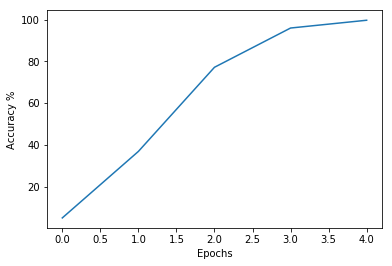

In [24]:
plot_acc(record4['acc'])